### Source code about report


import necessary library



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from d2l import tensorflow as d2l


# time for record time
import time

2023-12-03 16:08:01.171554: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 16:08:01.617617: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


 Import and load the Fashion MNIST data directly from TensorFlow

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Each image is mapped to a single label. 

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data exploring ###

image size:

In [4]:
train_images.shape

(60000, 28, 28)

Labels: 

In [5]:
len(train_labels)

60000

what label looks like:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

test set length

In [7]:
len(test_labels)

10000

Preprocess the data


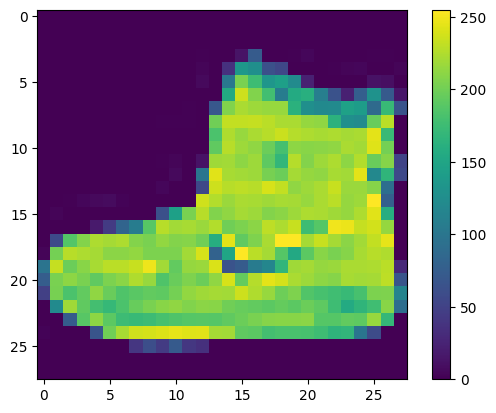

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

set the scale from 0 to 255 to 0 t0 1

In [9]:
train_images = train_images / 255
test_images = test_images / 255

check the data is in correct format or not: 

/tmp/ipykernel_12754/485746984.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(train_images[i],cmap=plt.cm.get_cmap())


<function matplotlib.pyplot.show(close=None, block=None)>

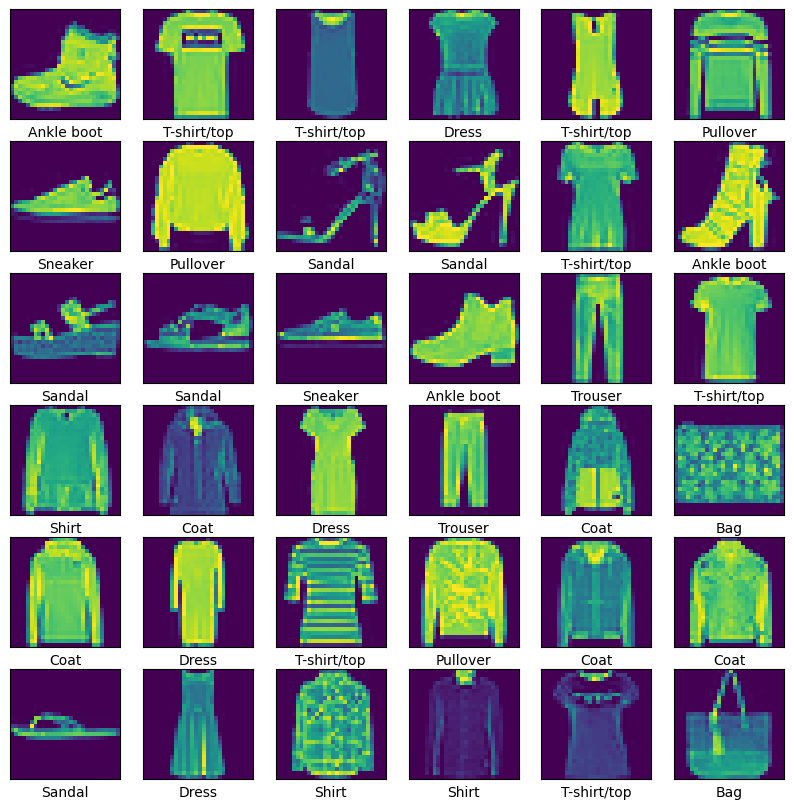

In [10]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.get_cmap())
    plt.xlabel(class_names[train_labels[i]])
plt.show


# Build multiple models to test which act better


Set a function to build model efficiently

In [16]:
def model_building(hidden_layers, learning_rate, optimizer, loss_fun):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    for i in range(hidden_layers):
        model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    optimizer = optimizer(learning_rate=learning_rate)
    model.compile(loss=loss_fun,optimizer=optimizer,metrics=['accuracy'])
    model.compile()
    return model
    

### First Factor: number of hidden_layer

1. Initialize variable

In [17]:
num_epochs = 10
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam
loss_fun = 'sparse_categorical_crossentropy'
hl_models = []
hl_history = []
hl_times = []
    

2. Build, train and evaluate models (You may need gpu to speed up the process)

In [18]:
for i in range(20):
    print("------Model with "+str(i)+" hidden layer(s) starts training------")
    model = model_building(i, learning_rate, optimizer, loss_fun)
    start_time = time.time()
    hist = model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels))
    end_time = time.time()
    hl_times.append(end_time - start_time)
    hl_models.append(model)
    hl_history.append(hist)
    print("------Model with "+str(i)+" hidden layer(s) ends training------")
print("！！！Training finished！！！\n")

------Model with 0 hidden layer(s) starts training------
Epoch 1/10
1875/1875 [==============================] - 1s 680us/step - loss: 0.5925 - accuracy: 0.8036 - val_loss: 0.5044 - val_accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.4601 - accuracy: 0.8436 - val_loss: 0.4939 - val_accuracy: 0.8298
Epoch 3/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.4351 - accuracy: 0.8508 - val_loss: 0.4641 - val_accuracy: 0.8392
Epoch 4/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.4228 - accuracy: 0.8543 - val_loss: 0.4573 - val_accuracy: 0.8399
Epoch 5/10
1875/1875 [==============================] - 1s 641us/step - loss: 0.4123 - accuracy: 0.8584 - val_loss: 0.4640 - val_accuracy: 0.8367
Epoch 6/10
1875/1875 [==============================] - 1s 634us/step - loss: 0.4072 - accuracy: 0.8591 - val_loss: 0.4520 - val_accuracy: 0.8404
Epoch 7/10
1875/1875 [==============================] - 1s 641us/st

3. Compare the model

Text(0.5, 1.0, 'Relationship between model accuracy and numbers of layers')

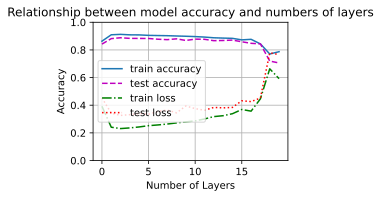

In [19]:
hl_train_accuracies = [hist.history['accuracy'][-1] for hist in hl_history]
hl_test_accuracies = [hist.history['val_accuracy'][-1] for hist in hl_history]
hl_train_losses = [hist.history['loss'][-1] for hist in hl_history]
hl_test_losses = [hist.history['val_loss'][-1] for hist in hl_history]
time_efficiency = [i/j * 1000 for i, j in zip(hl_test_accuracies , hl_times)]

# Use d2l to plot

d2l.plot(list(range(20)), [hl_train_accuracies, hl_test_accuracies,hl_train_losses,hl_test_losses],
         xlabel='Number of Layers', ylabel='Accuracy',
         legend=['train accuracy', 'test accuracy', 'train loss', 'test loss'], ylim=[0, 1])

d2l.plt.gca().set_title('Relationship between model accuracy and numbers of layers')

Text(0.5, 1.0, 'Relationship between Times & time efficiency (accuracy / time) and numbers of layers')

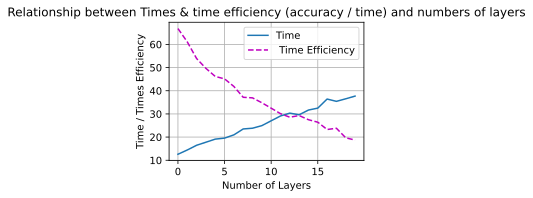

In [20]:
d2l.plot(list(range(20)), [hl_times,time_efficiency],
         xlabel='Number of Layers', ylabel='Time / Times Efficiency',
         legend=['Time',' Time Efficiency'])

d2l.plt.gca().set_title('Relationship between Times & time efficiency (accuracy / time) and numbers of layers')

4. Plot the training accuracy/loss and testing accuracy for the best model

The best model is the model with 2 hidden layers


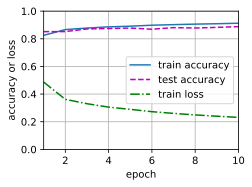

In [21]:

best_model_index = max(range(len(hl_models)), key = lambda index: hl_history[index].history['val_accuracy'][-1])
# I have tried this multiple time, but I find that the results differed(first time is three layers, the second is 2 layers...), so I need to record this for the further decision
# Now I guess the layers 
recode_layer_num = best_model_index 
best_hist = hl_history[best_model_index]

# Use d2l to plot
d2l.plot(list(range(1, num_epochs+1)), [best_hist.history['accuracy'], best_hist.history['val_accuracy'],best_hist.history['loss']],
         xlabel='epoch', ylabel='accuracy or loss',
         legend=['train accuracy', 'test accuracy','train loss'], xlim=[1,10],ylim=[0, 1])
print("The best model is the model with " +str(best_model_index)+" hidden layers")



### Second Factor: learning rate

1. Initiate value

In [22]:
num_epochs = 10
num_layers = recode_layer_num
optimizer = tf.keras.optimizers.Adam
loss_fun = 'sparse_categorical_crossentropy'
learning_rates = [0.1,0.07,0.01,0.007,0.001,0.0001]
lr_list = [str(num) for num in learning_rates]
lr_models = []
lr_history = []


2. Build, train and evaluate models

In [23]:
for i in range(6):
    print("------Model with "+str(learning_rates[i])+" learning rate starts training------")
    model = model_building(num_layers, learning_rates[i], optimizer, loss_fun)
    hist = model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels))
    lr_models.append(model)
    lr_history.append(hist)
    print("------Model with "+str(learning_rates[i])+" learning rate starts training------")
print("！！！Training finished！！！\n")

------Model with 0.1 learning rate starts training------
Epoch 1/10
1875/1875 [==============================] - 2s 965us/step - loss: 2.5521 - accuracy: 0.1043 - val_loss: 2.3278 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3153 - accuracy: 0.1010 - val_loss: 2.3175 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 988us/step - loss: 2.3157 - accuracy: 0.0988 - val_loss: 2.3060 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 1s 741us/step - loss: 2.3149 - accuracy: 0.1002 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 1s 732us/step - loss: 2.3146 - accuracy: 0.0992 - val_loss: 2.3175 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 1s 719us/step - loss: 2.3162 - accuracy: 0.0987 - val_loss: 2.3209 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 1s 735us/step

3. Compare the model

Text(0.5, 1.0, 'Relationship between model performance and numbers of layers')

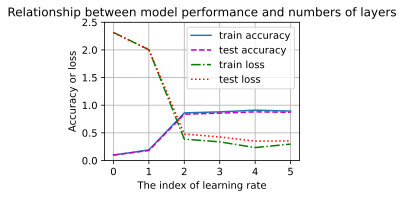

In [24]:
lr_train_accuracies = [hist.history['accuracy'][-1] for hist in lr_history]
lr_test_accuracies = [hist.history['val_accuracy'][-1] for hist in lr_history]
lr_train_losses = [hist.history['loss'][-1] for hist in lr_history]
lr_test_losses = [hist.history['val_loss'][-1] for hist in lr_history]

# Use d2l to plot
d2l.plot(list(range(0, 6)), [lr_train_accuracies, lr_test_accuracies,lr_train_losses,lr_test_losses],
         xlabel='The index of learning rate', ylabel='Accuracy or loss',
         legend=['train accuracy', 'test accuracy','train loss', 'test loss'], ylim=[0, 2.5])
d2l.plt.gca().set_title('Relationship between model performance and learning rates')

4. Plot the training accuracy/loss and testing accuracy for the best model

The best model is the model with 0.001 learning rate


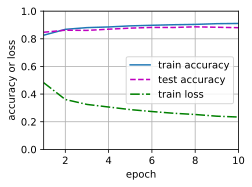

In [25]:
best_model_index = max(range(len(lr_models)), key = lambda index: lr_history[index].history['val_accuracy'][-1])
best_hist = lr_history[best_model_index]

# Use d2l to plot
d2l.plot(list(range(1, num_epochs+1)), [best_hist.history['accuracy'], best_hist.history['val_accuracy'],best_hist.history['loss']],
         xlabel='epoch', ylabel='accuracy or loss',
         legend=['train accuracy', 'test accuracy','train loss'], xlim=[1,10],ylim=[0, 1])

print("The best model is the model with " +str(learning_rates[best_model_index])+" learning rate")

### The third factors: optimizer

In [31]:
num_epochs = 10
num_layers = best_model_index
learning_rate = 0.001
optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD, tf.keras.optimizers.Adadelta]
loss_fun = 'sparse_categorical_crossentropy'
op_models = []
op_history = []
op_times = []


Adam


1. Initialize variable

In [32]:
for i in range(3):
    print("------Model with "+optimizers[i].__name__+" optimizer starts training------")
    model = model_building(num_layers, learning_rate, optimizers[i], loss_fun)
    start_time = time.time()
    hist = model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels))
    end_time = time.time()
    op_times.append(end_time - start_time)
    op_models.append(model)
    op_history.append(hist)
    print("------Model with "+optimizers[i].__name__+" optimizer ends training------")
print("！！！Training finished！！！\n")

------Model with Adam optimizer starts training------
Epoch 1/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.4995 - accuracy: 0.8190 - val_loss: 0.4788 - val_accuracy: 0.8308
Epoch 2/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.3738 - accuracy: 0.8648 - val_loss: 0.3831 - val_accuracy: 0.8589
Epoch 3/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.3391 - accuracy: 0.8757 - val_loss: 0.4146 - val_accuracy: 0.8499
Epoch 4/10
1875/1875 [==============================] - 2s 861us/step - loss: 0.3160 - accuracy: 0.8826 - val_loss: 0.3694 - val_accuracy: 0.8664
Epoch 5/10
1875/1875 [==============================] - 2s 861us/step - loss: 0.2985 - accuracy: 0.8895 - val_loss: 0.3457 - val_accuracy: 0.8747
Epoch 6/10
1875/1875 [==============================] - 2s 852us/step - loss: 0.2861 - accuracy: 0.8932 - val_loss: 0.3451 - val_accuracy: 0.8760
Epoch 7/10
1875/1875 [==============================] - 2s 838us/step 

2. Compare the models

Text(0.5, 1.0, 'Relationship between model performance and different optimiser')

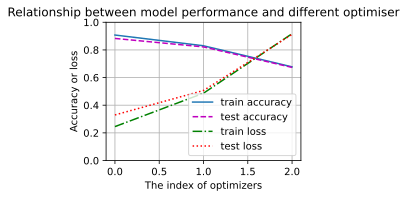

In [35]:
op_train_accuracies = [hist.history['accuracy'][-1] for hist in op_history]
op_test_accuracies = [hist.history['val_accuracy'][-1] for hist in op_history]
op_train_losses = [hist.history['loss'][-1] for hist in op_history]
op_test_losses = [hist.history['val_loss'][-1] for hist in op_history]

# Use d2l to plot
d2l.plot(list(range(3)), [op_train_accuracies, op_test_accuracies,op_train_losses,op_test_losses],
         xlabel='The index of optimizers', ylabel='Accuracy or loss',
         legend=['train accuracy', 'test accuracy','train loss', 'test loss'], ylim=[0, 1])
d2l.plt.gca().set_title('Relationship between model performance and different optimiser')


3. Find the best performance models

The best model is the model with Adam optimizer


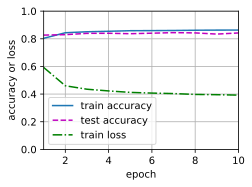

In [37]:
best_model_index = max(range(len(op_models)), key = lambda index: op_history[index].history['val_accuracy'][-1])

best_hist = hl_history[best_model_index]

# Use d2l to plot
d2l.plot(list(range(1, num_epochs+1)), [best_hist.history['accuracy'], best_hist.history['val_accuracy'],best_hist.history['loss']],
         xlabel='epoch', ylabel='accuracy or loss',
         legend=['train accuracy', 'test accuracy','train loss'], xlim=[1,10],ylim=[0, 1])
print("The best model is the model with " +optimizers[best_model_index].__name__+" optimizer")

### Last factor： loss function

1. Initialize the Model

In [95]:
num_epochs = 10
num_layers = best_model_index
learning_rate = 0.001
optimizers = tf.keras.optimizers.Adam

loss_funs = ['mean_squared_error', 'sparse_categorical_crossentropy', 'hinge']
lf_models = []
lf_history = []
lf_times = []

2. train the mode

In [96]:
for i in range(3):
    print("------Model with "+loss_funs[i]+" loss function starts training------")
    model = model_building(num_layers, learning_rate, optimizer, loss_funs[i])
    start_time = time.time()
    hist = model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels))
    end_time = time.time()
    lf_times.append(end_time - start_time)
    lf_models.append(model)
    lf_history.append(hist)
    print("------Model with "+loss_funs[i]+" loss function ends training------")
print("！！！Training finished！！！\n")

------Model with mean_squared_error loss function starts training------
Epoch 1/10
1875/1875 [==============================] - 1s 654us/step - loss: 27.6102 - accuracy: 0.1039 - val_loss: 27.6100 - val_accuracy: 0.1062
Epoch 2/10
1875/1875 [==============================] - 1s 690us/step - loss: 27.6101 - accuracy: 0.1016 - val_loss: 27.6100 - val_accuracy: 0.0740
Epoch 3/10
1875/1875 [==============================] - 1s 635us/step - loss: 27.6101 - accuracy: 0.0989 - val_loss: 27.6100 - val_accuracy: 0.0691
Epoch 4/10
1875/1875 [==============================] - 1s 679us/step - loss: 27.6101 - accuracy: 0.1001 - val_loss: 27.6100 - val_accuracy: 0.0616
Epoch 5/10
1875/1875 [==============================] - 1s 643us/step - loss: 27.6101 - accuracy: 0.1009 - val_loss: 27.6100 - val_accuracy: 0.0827
Epoch 6/10
1875/1875 [==============================] - 1s 701us/step - loss: 27.6101 - accuracy: 0.0987 - val_loss: 27.6100 - val_accuracy: 0.1251
Epoch 7/10
1875/1875 [==================

3. compare the model

Text(0.5, 1.0, 'Relationship between model performance and loss function')

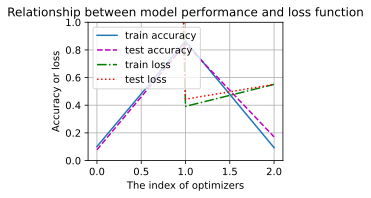

In [98]:
lf_train_accuracies = [hist.history['accuracy'][-1] for hist in lf_history]
lf_test_accuracies = [hist.history['val_accuracy'][-1] for hist in lf_history]
lf_train_losses = [hist.history['loss'][-1] for hist in lf_history]
lf_test_losses = [hist.history['val_loss'][-1] for hist in lf_history]

# Use d2l to plot
d2l.plot(list(range(3)), [lf_train_accuracies, lf_test_accuracies,lf_train_losses,lf_test_losses],
         xlabel='The index of optimizers', ylabel='Accuracy or loss',
         legend=['train accuracy', 'test accuracy','train loss', 'test loss'], ylim=[0, 1])
d2l.plt.gca().set_title('Relationship between model performance and loss function')

4. Find the best model

The best model is the model with sparse_categorical_crossentropy loss function


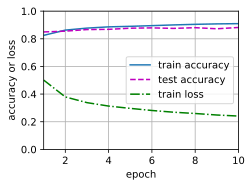

In [101]:
best_model_index = max(range(len(op_models)), key = lambda index: lf_history[index].history['val_accuracy'][-1])

best_hist = hl_history[best_model_index]

# Use d2l to plot
d2l.plot(list(range(1, num_epochs+1)), [best_hist.history['accuracy'], best_hist.history['val_accuracy'],best_hist.history['loss']],
         xlabel='epoch', ylabel='accuracy or loss',
         legend=['train accuracy', 'test accuracy','train loss'], xlim=[1,10],ylim=[0, 1])
print("The best model is the model with " +loss_funs[best_model_index]+" loss function")

## Summary

The best model is:

In [103]:
best_model = model_building(hidden_layers= best_model_index, learning_rate=0.001, optimizer= tf.keras.optimizers.Adam, loss_fun='sparse_categorical_crossentropy')

Train it

In [104]:
hist = best_model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 731us/step - loss: 0.4971 - accuracy: 0.8259 - val_loss: 0.4255 - val_accuracy: 0.8479
Epoch 2/10
1875/1875 [==============================] - 1s 716us/step - loss: 0.3737 - accuracy: 0.8655 - val_loss: 0.3866 - val_accuracy: 0.8599
Epoch 3/10
1875/1875 [==============================] - 1s 690us/step - loss: 0.3372 - accuracy: 0.8770 - val_loss: 0.3706 - val_accuracy: 0.8673
Epoch 4/10
1875/1875 [==============================] - 1s 708us/step - loss: 0.3135 - accuracy: 0.8849 - val_loss: 0.3655 - val_accuracy: 0.8626
Epoch 5/10
1875/1875 [==============================] - 1s 712us/step - loss: 0.2953 - accuracy: 0.8913 - val_loss: 0.3654 - val_accuracy: 0.8708
Epoch 6/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.2818 - accuracy: 0.8964 - val_loss: 0.3422 - val_accuracy: 0.8761
Epoch 7/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.2682 - accuracy: 0.8995 - val_loss: 0.3338 -

Plot the graph about the model

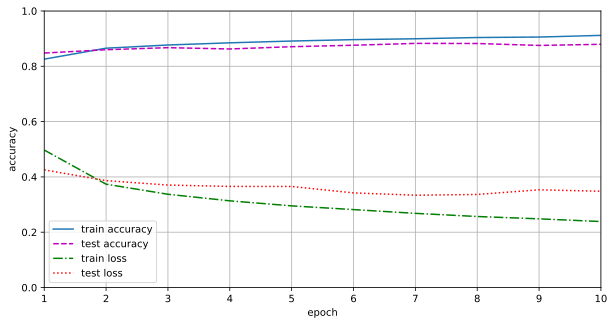

In [109]:
train_accuracy = hist.history['accuracy']
test_accuracy = hist.history['val_accuracy']

train_loss = hist.history['loss']
test_loss = hist.history['val_loss']

plt.figure(figsize=(10, 5))

# 绘制准确率曲线
d2l.plot(list(range(1,1+num_epochs)), [train_accuracy, test_accuracy, train_loss, test_loss], xlabel='epoch', ylabel='accuracy',
         legend=['train accuracy', 'test accuracy', 'train loss', 'test loss'], xlim=[1, num_epochs], ylim=[0, 1])
